<a id='title'></a> 
# Описание проекта "Предсказание объёма нефти в скважинах".

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

Работу над проектом будем проводить по следующему плану:

### Этап 1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ:

<a href='#1.1'>1.1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ.</a> 

### Этап 2. Обучение и проверка модели:

<a href='#2.1'>2.1. Обучение и проверка модели.</a>

### Этап 3. Подготовка к расчёту прибыли:

<a href='#3.1'>3.1. Подготовка к расчёту прибыли.</a>

### Этап 4. Расчёт прибыли и рисков: 

<a href='#4.1'>4.1. Расчёт прибыли и рисков.</a>

# Этап 1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ.

<a id='1.1'></a> 
## Этап 1.1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ.

Для начала импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import seaborn
import matplotlib.pyplot as plt
from scipy import stats as st

Библиотеки загружены. 

Теперь считаем набор данных.

In [2]:
reg_1, reg_2, reg_3 = pd.read_csv('/datasets/geo_data_0.csv'), \
pd.read_csv('/datasets/geo_data_1.csv'), \
pd.read_csv('/datasets/geo_data_2.csv')

Посмотрим на набор данных.

Для этого напишем функцию, которая будет принимать на вход набор данных и отображать информацию о нём: первые 10 строк набора данных, типы содержащихся в нём данных, его размер, наличие пропусков и дубликатов, а также уникальные значения в каждом из полей.

In [3]:
def df_info(df):
    print('Первые 10 строк DF')
    display(df.head(10))
    print('Общая информация о DF')
    display(df.info())
    print('Размер df:', df.shape)
    print()
    print('Пропуски в df')
    display(df.isna().sum())
    print('Количество дубликатов в df:', df.duplicated().sum())
    print()
    for col in df.columns:
        print('*** Поле', col + ': уникальные значения ***')
        display(df[col].value_counts())

Применим функцию к нашим наборам данных.

In [4]:
df_info(reg_1)

Первые 10 строк DF


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Размер df: (100000, 5)

Пропуски в df


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество дубликатов в df: 0

*** Поле id: уникальные значения ***


TtcGQ    2
Tdehs    2
A5aEY    2
bxg6G    2
fiKDv    2
        ..
g22Ci    1
osL8F    1
72D8Y    1
yQZK9    1
DQVRz    1
Name: id, Length: 99990, dtype: int64

*** Поле f0: уникальные значения ***


-1.017607    1
 1.147603    1
-0.731757    1
-1.193550    1
 0.796797    1
            ..
 0.946916    1
 0.144982    1
 0.033429    1
 1.858456    1
 0.509805    1
Name: f0, Length: 100000, dtype: int64

*** Поле f1: уникальные значения ***


 0.675282    1
 0.226651    1
 0.824733    1
 0.132691    1
 0.507665    1
            ..
-0.433377    1
 0.546259    1
 0.530130    1
 0.045090    1
 0.685045    1
Name: f1, Length: 100000, dtype: int64

*** Поле f2: уникальные значения ***


 2.163763    1
-0.828819    1
 4.382419    1
 7.247306    1
 3.808803    1
            ..
 5.221342    1
 2.882526    1
-2.471990    1
-1.470932    1
 7.645954    1
Name: f2, Length: 100000, dtype: int64

*** Поле product: уникальные значения ***


133.484532    1
62.168021     1
132.876558    1
72.311385     1
126.226062    1
             ..
101.234649    1
88.864080     1
32.143997     1
121.947543    1
122.698141    1
Name: product, Length: 100000, dtype: int64

In [5]:
df_info(reg_2)

Первые 10 строк DF


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Размер df: (100000, 5)

Пропуски в df


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество дубликатов в df: 0

*** Поле id: уникальные значения ***


5ltQ6    2
LHZR0    2
bfPNe    2
wt4Uk    2
7bzEa    1
        ..
pWg5L    1
teQzJ    1
3PySe    1
d0FY2    1
wt1A4    1
Name: id, Length: 99996, dtype: int64

*** Поле f0: уникальные значения ***


-4.545515     1
 5.297343     1
-13.075676    1
 0.384176     1
 21.030916    1
             ..
-4.506841     1
-2.148038     1
-8.212404     1
-0.706976     1
-5.245586     1
Name: f0, Length: 100000, dtype: int64

*** Поле f1: уникальные значения ***


-2.420454     1
-8.292583     1
-8.575602     1
-8.043060     1
-4.761843     1
             ..
-2.429287     1
-10.155352    1
-8.125222     1
-8.109408     1
-2.703362     1
Name: f1, Length: 100000, dtype: int64

*** Поле f2: уникальные значения ***


 2.002652    1
-0.002297    1
 2.989817    1
 0.989551    1
 1.006905    1
            ..
 2.009115    1
 3.005888    1
 3.001586    1
 4.993298    1
 1.999259    1
Name: f2, Length: 100000, dtype: int64

*** Поле product: уникальные значения ***


53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

In [6]:
df_info(reg_3)

Первые 10 строк DF


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


Общая информация о DF
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Размер df: (100000, 5)

Пропуски в df


id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

Количество дубликатов в df: 0

*** Поле id: уникальные значения ***


xCHr8    2
VF7Jo    2
KUPhW    2
Vcm5J    2
nbSrI    1
        ..
GuAz5    1
9MfqH    1
f9V4S    1
vkehD    1
NjeB0    1
Name: id, Length: 99996, dtype: int64

*** Поле f0: уникальные значения ***


-1.648445    1
 1.003758    1
-1.864906    1
-3.603933    1
 0.213231    1
            ..
 0.233296    1
 0.736351    1
 1.823606    1
-1.117580    1
 0.728740    1
Name: f0, Length: 100000, dtype: int64

*** Поле f1: уникальные значения ***


-1.888663    1
 1.254449    1
-2.240571    1
 1.341936    1
 0.103396    1
            ..
-0.702685    1
-1.820815    1
-1.302992    1
 0.242257    1
 2.623684    1
Name: f1, Length: 100000, dtype: int64

*** Поле f2: уникальные значения ***


 5.256481     1
-1.473363     1
-0.068485     1
 0.677459     1
 5.579063     1
             ..
 10.022118    1
 3.093945     1
-1.125733     1
 1.843601     1
 4.732407     1
Name: f2, Length: 100000, dtype: int64

*** Поле product: уникальные значения ***


133.530141    1
33.643997     1
12.244055     1
100.428232    1
44.765835     1
             ..
111.949405    1
116.305618    1
179.755799    1
18.538959     1
0.000000      1
Name: product, Length: 100000, dtype: int64

# Выводы по этапу 1.

На данном этапе мы импортировали необходимые библиотеки, а также считали и проанализировали предоставленные наборы данных.

Можно отметить, что в наборе данных представлены пробы нефти в трёх регионах. По атрибутному составу наборы данных идентичны друг другу: все три набора данных содержат id скважины, 3 параметра, описывающие некоторые характеристики скважин, а также объём запасов нефти в скважине (в тыс. баррелей). 

Каждый набор данных сожержит по 100 тыс. наблюдений. 

Данные не содержат аномалий, дубликатов или пропущенных значений, поэтому их предварительная обработка не требуется.

<a href='#title'>К оглавлению.</a>

# Этап 2. Обучение и проверка модели.

<a id='2.1'></a> 
## Этап 2.1. Обучение и проверка модели.

Для начала нужно разделить нашу выборку на тренировочную и валидационную части в соотношении 75% : 25%.

Напишем соответствующую функцию.

In [7]:
def train_validate_split(df):
    target = df['product']
    features = df.drop(['product', 'id'], axis = 1)
    features_train, features_validate, target_train, target_validate = \
    train_test_split(features, target, test_size = 0.25, random_state = 12345)
    print('Количество объектов в features_train:', features_train.shape[0])
    print('Количество объектов в features_validate:', features_validate.shape[0])
    print('Количество объектов в target_train:', target_train.shape[0])
    print('Количество объектов в target_validate:', target_validate.shape[0])
    print('Количетсво объектов в изначальном наборе данных:', df.shape[0])
    
    return features_train, features_validate, target_train, target_validate

Применим функцию к нашим наборам данных.

In [8]:
features_train_1, features_validate_1, target_train_1, target_validate_1 = train_validate_split(reg_1)

Количество объектов в features_train: 75000
Количество объектов в features_validate: 25000
Количество объектов в target_train: 75000
Количество объектов в target_validate: 25000
Количетсво объектов в изначальном наборе данных: 100000


In [9]:
features_train_2, features_validate_2, target_train_2, target_validate_2 = train_validate_split(reg_2)

Количество объектов в features_train: 75000
Количество объектов в features_validate: 25000
Количество объектов в target_train: 75000
Количество объектов в target_validate: 25000
Количетсво объектов в изначальном наборе данных: 100000


In [10]:
features_train_3, features_validate_3, target_train_3, target_validate_3 = train_validate_split(reg_3)

Количество объектов в features_train: 75000
Количество объектов в features_validate: 25000
Количество объектов в target_train: 75000
Количество объектов в target_validate: 25000
Количетсво объектов в изначальном наборе данных: 100000


Обучим модель линейной регрессии и предскажем объём добычи нефти для каждого региона.

По условию проекта в каждом регионе исследуется 500 месторождений. Так как прогноз модели мы будем использовать в качестве базы для расчёта прибыли, на этапе формирования предсказаний объёмов добычи нефти отберём 500 лучших скважин и сравним результаты прогноза с данными валидационной выборки.

Для этого напишем функцию.

In [11]:
def linear_regression_model(features_train, features_validate, target_train, target_validate, all_points = 500):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predictions = pd.Series(model.predict(features_validate), index = features_validate.index)
    mse = mean_squared_error(target_validate.loc[predictions.index], predictions)
    rmse = pow(mse, 0.5)
    print('Средний запас предсказанного сырья:', round(predictions.mean(),2), 'тыс.баррелей')
    print('RMSE:', round(rmse, 4))
    
    return predictions.mean(), rmse, predictions

In [12]:
mean_product_1, rmse_1, predictions_1 = linear_regression_model(features_train_1, features_validate_1, 
                                                                target_train_1, target_validate_1)

Средний запас предсказанного сырья: 92.59 тыс.баррелей
RMSE: 37.5794


In [13]:
mean_product_2, rmse_2, predictions_2 = linear_regression_model(features_train_2, features_validate_2, 
                                                                target_train_2, target_validate_2)

Средний запас предсказанного сырья: 68.73 тыс.баррелей
RMSE: 0.8931


In [14]:
mean_product_3, rmse_3, predictions_3 = linear_regression_model(features_train_3, features_validate_3, 
                                                                target_train_3, target_validate_3)

Средний запас предсказанного сырья: 94.97 тыс.баррелей
RMSE: 40.0297


Визуализируем информацию.

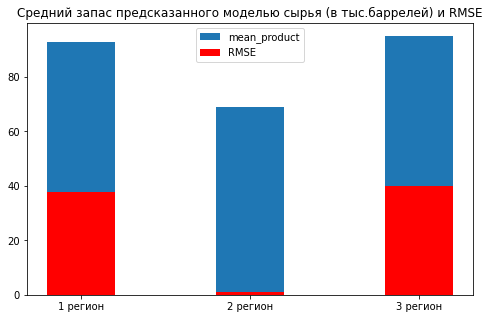

In [15]:
rmse = [rmse_1, rmse_2, rmse_3]
mean_product = [mean_product_1, mean_product_2, mean_product_3]
regions = ['1 регион', '2 регион', '3 регион']
columns = ['region', 'mean_product', 'rmse']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5))

ax.bar(x = regions, height = mean_product, label = 'mean_product', width = 0.4)
ax.bar(x = regions, height = rmse, color = 'r', label = 'RMSE', width = 0.4)
ax.set_title('Средний запас предсказанного моделью сырья (в тыс.баррелей) и RMSE')
ax.legend()

plt.show()

# Выводы по этапу 2.

На данном этапе было произведено разделение наборов данных на тренировочную и валидационную части в соотношении 75% : 25%. Для разделения наборов данных на выборки была написана соответствующая функция.

Также для предсказания объёмов добычи нефти для всех трёх регионов была построеная модель линейной регрессии, для каждого региона был посчитан средний запас предсказанного сырья, а также определена метрика RMSE. Соответствующие метрики были сохранены в определённые переменные. Этот функционал также был реализован с помощью функции. При этом прогноз, построенный моделью, был отсортирован по убыванию объёмов добычи нефти, и RMSE и средний запас предсказанного сырья были оценены для топ-200 месторождений.

Наиболее оптимальное предсказание было построено для второго региона. Предсказанный средний запас сырья составил 68.73 тыс.баррелей, при этом данное предсказание отличается низким значением ошибки: в среднем, при предсказывании объёма добычи нефти в скважине ошибка модели составляет 0.89 тыс.баррелей. 

Можно сказать, что данный прогноз является консервативным: он предсказывает меньшие по сравнению с другими регионами объёмы добычи нефти, однако это предсказание более точное относительно других регионов.

Венчурным регионом - регионом с наибольшим риском - можно назвать 3 регион: модель предсказала средний объём добываемой нефти в размере 94.97 тыс.баррелей, при этом в среднем модель ошибается на 40.03 тыс.баррелей при предсказании объёма добычи нефти. Таким образом, модель предсказывает достаточно высокие объёмы добычи нефти относительно консервативной модели, однако эта модель допускает более высокую погрешность при предсказаннии объёмов добычи нефти. 

<a href='#title'>К оглавлению.</a>

# Этап 3. Подготовка к расчёту прибыли.

<a id='3.1'></a>
## Этап 3.1. Подготовка к расчёту прибыли.

Для начала зафиксируем некоторые константы.

In [16]:
#общее количество скважин, которые разведываются при исследовании региона
all_points = 500
#количество лучших скважин, которые разрабатываются после исследования региона
top_points = 200
#доход с каждой единицы продукта (в тыс. руб.)
income_per_one = 450
#бюджет на разработку скважин в регионе (10 миллиардов = 10 000 000 тысяч, переведено для удобство, так как доход с 
#единицы продукта у нас тоже в тысячах)
budget = 10000000

Теперь для каждого региона определим необходимый объём добычи нефти, чтобы компания достигла точки безубыточности, т.е. ситуации, при которой доход от продажи добытых объёмов нефти стал равен бюджету на освоение новых месторождений.

При этом по условию проекта из 500 исследованых месторождений может быть разработано только 200.

Для этого напишем соответствующую функцию. На вход функция будет принимать переменную с предсказанными объёмами добычи нефти в регионе средний предсказанный объём нефти в регионе, а возвращать - необходимые для достижения точки безубычтонсоти объёмы добычи нефти.

In [17]:
def breakeven_point(predictions, mean_value, rmse):
    extraction_volume = 0
    income = 0
    counter = 0
    for i in predictions.sort_values(ascending = False)[:top_points]:
        if income < (budget / 1000000):
            extraction_volume += i
            income += ((i * income_per_one) / 1000000)
            counter += 1
        else:
            break
    required_volume = extraction_volume / counter
    free_wells = top_points - counter
    breakeven_volume = extraction_volume / top_points
    add_income_per_one = ((extraction_volume / counter) * income_per_one) / 1000000
    add_income_total = ((top_points - counter) * income_per_one * mean_value) / 1000000
    print('Точка безубыточности достигается при объёме добычи нефти в', round(extraction_volume, 2), 
          'тыс.баррелей, при этом компания получит', round(income, 2), 'млрд.руб.')
    print('При этом компания должна разведать не менее', counter,'месторождений')
    print('Для этого каждом месторождении, в среднем, должно находится около', 
         round(required_volume, 2), 'тыс.баррелей нефти')
    print('В данном регионе - согласно прогнозу модели - в каждой скважине, в среднем, залегает', 
          round(mean_value, 2), 'тыс.баррелей нефти')
    print('В данном регионе точкой безубыточности по добыче на одну скважину является',  
          round(breakeven_volume, 2), 'тыс.баррелей нефти')       
    print('Остаток неразработанных скважин после достижения точки безубыточности составит', free_wells, 'единиц')
    print('Разработка каждого нового месторождения позволит компании получить',
         round(add_income_per_one, 2), 'млрд.руб.')
    print('Разработка оставшихся месторождений позволит компании получить доход в размере',
         round(add_income_total, 2), 'млрд.руб.')
    print('Однако модель, в среднем, всегда ошибается на', round(rmse, 2), 
          'тыс.баррелей нефти при предсказанни объёма нефти в скважине')
    
    return extraction_volume, income, counter, required_volume, breakeven_volume, \
free_wells, add_income_per_one, add_income_total

Применим функцию к нашим предсказаниям.

In [18]:
extraction_volume_1, income_1, counter_1, required_volume_1, breakeven_volume_1, free_wells_1, \
add_income_per_one_1, add_income_total_1 = breakeven_point(predictions_1, mean_product_1, rmse_1)

Точка безубыточности достигается при объёме добычи нефти в 22268.06 тыс.баррелей, при этом компания получит 10.02 млрд.руб.
При этом компания должна разведать не менее 141 месторождений
Для этого каждом месторождении, в среднем, должно находится около 157.93 тыс.баррелей нефти
В данном регионе - согласно прогнозу модели - в каждой скважине, в среднем, залегает 92.59 тыс.баррелей нефти
В данном регионе точкой безубыточности по добыче на одну скважину является 111.34 тыс.баррелей нефти
Остаток неразработанных скважин после достижения точки безубыточности составит 59 единиц
Разработка каждого нового месторождения позволит компании получить 0.07 млрд.руб.
Разработка оставшихся месторождений позволит компании получить доход в размере 2.46 млрд.руб.
Однако модель, в среднем, всегда ошибается на 37.58 тыс.баррелей нефти при предсказанни объёма нефти в скважине


In [19]:
extraction_volume_2, income_2, counter_2, required_volume_2, breakeven_volume_2, free_wells_2, \
add_income_per_one_2, add_income_total_2 = breakeven_point(predictions_2, mean_product_2, rmse_2)

Точка безубыточности достигается при объёме добычи нефти в 22346.41 тыс.баррелей, при этом компания получит 10.06 млрд.руб.
При этом компания должна разведать не менее 161 месторождений
Для этого каждом месторождении, в среднем, должно находится около 138.8 тыс.баррелей нефти
В данном регионе - согласно прогнозу модели - в каждой скважине, в среднем, залегает 68.73 тыс.баррелей нефти
В данном регионе точкой безубыточности по добыче на одну скважину является 111.73 тыс.баррелей нефти
Остаток неразработанных скважин после достижения точки безубыточности составит 39 единиц
Разработка каждого нового месторождения позволит компании получить 0.06 млрд.руб.
Разработка оставшихся месторождений позволит компании получить доход в размере 1.21 млрд.руб.
Однако модель, в среднем, всегда ошибается на 0.89 тыс.баррелей нефти при предсказанни объёма нефти в скважине


In [20]:
extraction_volume_3, income_3, counter_3, required_volume_3, breakeven_volume_3, free_wells_3, \
add_income_per_one_3, add_income_total_3 = breakeven_point(predictions_3, mean_product_3, rmse_3)

Точка безубыточности достигается при объёме добычи нефти в 22307.07 тыс.баррелей, при этом компания получит 10.04 млрд.руб.
При этом компания должна разведать не менее 149 месторождений
Для этого каждом месторождении, в среднем, должно находится около 149.71 тыс.баррелей нефти
В данном регионе - согласно прогнозу модели - в каждой скважине, в среднем, залегает 94.97 тыс.баррелей нефти
В данном регионе точкой безубыточности по добыче на одну скважину является 111.54 тыс.баррелей нефти
Остаток неразработанных скважин после достижения точки безубыточности составит 51 единиц
Разработка каждого нового месторождения позволит компании получить 0.07 млрд.руб.
Разработка оставшихся месторождений позволит компании получить доход в размере 2.18 млрд.руб.
Однако модель, в среднем, всегда ошибается на 40.03 тыс.баррелей нефти при предсказанни объёма нефти в скважине


Так как мы посчитали много различных метрик, визуализируем их.

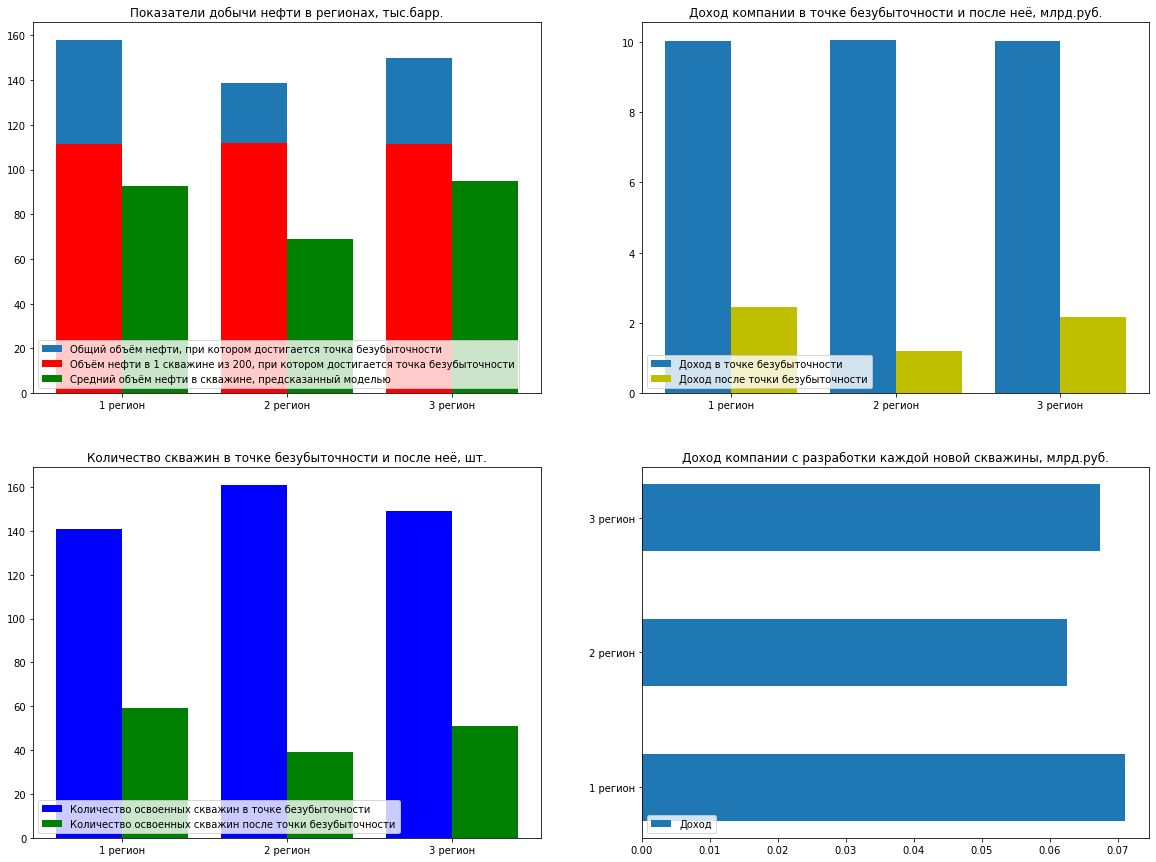

In [21]:
extraction_volume = [extraction_volume_1, extraction_volume_2, extraction_volume_3]
income = [income_1, income_2, income_3]
counter = [counter_1, counter_2, counter_3]
required_volume = [required_volume_1, required_volume_2, required_volume_3]
breakeven_volume = [breakeven_volume_1, breakeven_volume_2, breakeven_volume_3]
free_wells = [free_wells_1, free_wells_2, free_wells_3]
add_income_per_one = [add_income_per_one_1, add_income_per_one_2, add_income_per_one_3]
add_income_total = [add_income_total_1, add_income_total_2, add_income_total_3]
regions = ['1 регион', '2 регион', '3 регион']

fig, axes = plt.subplots(2, 2, figsize = (20, 15))

x = np.arange(len(regions))
col_1 = axes[0][0].bar(x - (0.4/2), height = required_volume, 
                       label = 'Общий объём нефти, при котором достигается точка безубыточности', width = 0.4)
col_2 = axes[0][0].bar(x - (0.4/2), height = breakeven_volume, color = 'r', 
                       label = 'Объём нефти в 1 скважине из 200, при котором достигается точка безубыточности', width = 0.4)
col_3 = axes[0][0].bar(x + (0.4/2), height = mean_product, color = 'g', 
                       label = 'Средний объём нефти в скважине, предсказанный моделью', width = 0.4)
axes[0][0].set_xticks(x)
axes[0][0].set_xticklabels(regions)
axes[0][0].set_title('Показатели добычи нефти в регионах, тыс.барр.')
axes[0][0].legend(loc = 'lower left')

col_1 = axes[0][1].bar(x - (0.4/2), height = income, label = 'Доход в точке безубыточности', width = 0.4)
col_2 = axes[0][1].bar(x + (0.4/2), height = add_income_total, label = 'Доход после точки безубыточности', 
                       color = 'y', width = 0.4)
axes[0][1].set_xticks(x)
axes[0][1].set_xticklabels(regions)
axes[0][1].set_title('Доход компании в точке безубыточности и после неё, млрд.руб.')
axes[0][1].legend(loc = 'lower left')

x = np.arange(len(regions))
col_1 = axes[1][0].bar(x - (0.4/2), height = counter, label = 'Количество освоенных скважин в точке безубыточности', 
                       width = 0.4, color = 'b')
col_2 = axes[1][0].bar(x + (0.4/2), height = free_wells, label = 'Количество освоенных скважин после точки безубыточности', 
                       color = 'g', width = 0.4)
axes[1][0].set_xticks(x)
axes[1][0].set_xticklabels(regions)
axes[1][0].set_title('Количество скважин в точке безубыточности и после неё, шт.')
axes[1][0].legend(loc = 'lower left')

axes[1][1].barh(y = regions, width = add_income_per_one, label = 'Доход', height = 0.5)
axes[1][1].set_title('Доход компании с разработки каждой новой скважины, млрд.руб.')
axes[1][1].legend(loc = 'lower left')

plt.show()

# Вывод по этапу 3.

На данном этапе мы зафиксировали ряд констант, которые пригодятся при расчёте прибыли и рисков, а также определили точку безубыточности и другие бизнес-метрики, на основе которых можно принять решение о регионе, в котором будут вестись работы по разработке месторождений.

По результатам расчётов видим, что для достижения точки безубыточности компании нужно разведать не менее 141 месторождения в 1 регионе, не менее 161 месторождения во 2 регионе и не менее 149 месторождений в 3 регионе. 

При этом в каждой скважине, в среднем, должно быть около 157.93 тыс.баррелей нефти, 138.8 тыс.баррелей нефти и 149.71 тыс.баррелей нефти в 1, 2 и 3 регионах соответственно.

Построенная модель предсказала средние запасы нефти в скважине в 148.37 тыс.баррелей нефти для 1 региона, в 138.39 тыс.баррелей нефти для 2 региона и 142.33 тыс.баррелей нефти для 3 региона.

Также известно, что при предсказании объёмов нефти модель, в среднем, ошибается на 28.23 тыс.баррелей нефти в 1 регионе, на 0.58 тыс.баррелей нефти во 2 регионе и на 30.76 тыс.баррелей нефти в 3 регионе.

При этом в 1 регионе останется ещё 59 скважин для разработки, во 3 регионе - 39, в 3 регионе - 51.

Разработка каждой новой скважины в 1 регионе принесёт компании 0.07 млрд.руб, во 2 регионе - 0.06 млрд.руб., в 3 регионе - 0.07 млрд.руб.

Разработка всех оставшихся скважин в 1 регионе принесёт компании 3.94 млрд.руб., во 2 регионе - 2.43 млрд.руб., в 3 регионе - 3.27 млрд.руб.

Также мы видим, что при указанном количестве скважин, необходимых к разработке, а также при требуемом среднем объёме запасов нефти в каждой скважине, компания получит доход в размере 10.02 млрд.руб., 10.06 млрд.руб. и 10.04 млрд.руб. в 1, 2 и 3 регионах соответственно. Это на 0.02 млрд.руб., 0.06 млрд.руб. и 0.04 млрд.руб. больше, чем требуется для достижения точки безубыточности, в 1, 2 и 3 регионах соответственно.

Кроме того, известно, что в каждом регионе может быть разработано только 200 месторождений. Поэтому был рассчитан требуемый для выхода на точку безубыточности объём нефти из расчёта на 200 месторождений. Так, для 1 региона он составил 111.34 тыс.баррелей нефти, для 2 региона - 111.73 тыс.баррелей нефти, для 3 региона - 111.54 тыс.баррелей нефти. В каждом из регионов требуемый для выхода на точку безубыточности объём нефти из расчёта на 200 месторождений выше тех среднийх объёмов запасов нефти, предсказанных моделью.

Таким образом, видно, что требуемый для достижения точки безубыточности предсказанный средний объём нефти в скважине при заданном количестве месторождений и необходимом объёме нефти в каждом из них недостаточен для выхода в точку безубыточности в каждом из регионов.

Вместе с тем отмечу, что при расчёте требуемого для выхода на точку безубыточности объёма нефти из расчёта на 200 месторождений использовались все предсказанные моделью запасы нефти в регионе - большие и небольшие. Соответственно, регионы с низкими величинами запасов нефти снижали требуемый для выхода на точку безубыточности объём нефти. Поэтому из всех предсказаний необходимо отобрать 200 с наибольшими запасами нефти и оценивать по ним прибыль и риски.

<a href='#title'>К оглавлению.</a>

# Этап 4. Расчёт прибыли и рисков.

<a id='4.1'></a>
## Этап 4.1. Расчёт прибыли и рисков.

В нащем распоряжении имеется значение предсказанного объёмов нефти в каждой скважине и истинные значения объёмов нефти для этих скважин. Так как в пределах бюджета может быть разведано только 200 скважин, в переменных predictions_1, predictions_2 и predictions_3 собраны 500 предсказаний объёмов нефти, построенные моделью, отсортированные в порядке убывания их объёма.

Чтобы посчитать прибыль, необходимо посчитать прибыль, которую могла бы получить компания, если бы она разведала 200 определённых моделью скважин и извлекла из них предсказанный объём нефти, и сравнить это значение с прибылью, рассчитанной на истинных данных.

Напишем соответствующую функцию, которая будет принимать на вход предсказания и правильные ответы и рассчитывать необходимое значение прибыли.

In [22]:
def profit(predictions, target):
    pred_sorted = predictions.sort_values(ascending=False)
    select_points = target.loc[pred_sorted.index][:200]
    product = select_points.sum()
    revenue = round(((product * income_per_one) / 1000000), 2)
    profit = revenue - (budget / 1000000)
    
    return profit

Применим функцию к нашим данным.

In [23]:
print('Прибыль в 1 регионе:', round(profit(predictions_1, target_validate_1), 2), 'млрд.руб.')

Прибыль в 1 регионе: 3.32 млрд.руб.


In [24]:
print('Прибыль во 2 регионе:', round(profit(predictions_2, target_validate_2), 2), 'млрд.руб.')

Прибыль во 2 регионе: 2.42 млрд.руб.


In [25]:
print('Прибыль в 3 регионе:', round(profit(predictions_3, target_validate_3), 3), 'млрд.руб.')

Прибыль в 3 регионе: 2.71 млрд.руб.


Из расчётов видим, что наиболее прибыльным является 1 регион: при разработке скважин в этом регионе компания получит прибыль в размере 3.32 млрд.руб. млрд.руб. Отмечу, что прибыль в данном случае - это разница между совокупным доходом и бюджетом на освоение региона.

Напротив, наименее прибыльным регионом является 2 регион: при разработке скважин в этом регионе компания получит прибыль в размере 2.42 млрд.руб.

Однако стоит отметить, что данные величины прибыли получены с допущением, что из всех 25 000 скважин, которые есть в регионе, мы разведываем 200 с наибольшими запасами нефти.

На практике такое будет случаться не всегда, поэтому применим бутстрапирование и узнаем более вероятное значение прибыли при разработке месторождений в том или ином регионе, а также вероятность получения прибыли в случае проведения работ в регионе.

Для этого построим распределение прибыли, используя бутстрапирование с 1000 выборок: из набора данных с предсказаниями объёма добычи нефти для каждого региона случайным обазом 1000 раз отберём 200 скважин и посчитаем прибыль, которую получит компания при разработке этих скважин. 

Затем посчитаем среднее значение прибыли из 1000 значений прибыли для бутстрапированных выборок и определим 95%-интервал для этого среднего значения.

Напишем соответствующую функцию.

Функция будет принимать на вход набор с предсказанными и истинными объёмами запасов нефти в каждой скважине.

Алгоритм функции:

1. Формирует бутстрапированные выборки в количестве 1000 единиц, при этом в каждой выборке будет по 500 скважин.


2. Каждую из 1000 выборок передаёт функции profit, получает из неё значение прибыли и добавляет его в список profit_list.


3. Рассчитывает среднее значение бутстрапированной прибыли, 95% доверительный интервал для этого среднего значения, а также стандартную ошибку среднего.


4. Дополнительно определяет интервал, в котором будет лежать 95% значений бутстрапированной прибыли, а также размах этого интервала.


5. Определяет вероятность получения убытков при работе в исследуемом регионе.


6. Визуализирует распределение значений бутстрапированной прибыли.

In [26]:
def bootstrap(predictions, target):
    profit_list = []
    state = np.random.RandomState(12345)
    for i in range(1000):
        target_sample = target.sample(500, replace=True, random_state = state)
        predict_sample = predictions.loc[target_sample.index]
        profit_list.append(profit(predict_sample, target_sample))
    profit_list = pd.Series(profit_list)
    confidence_interval = st.t.interval(0.95, len(profit_list)-1, profit_list.mean(), profit_list.sem())
    print('Среднее значение бутстрапированной прибыли для данного региона:', round(profit_list.mean(), 2), 'млрд.руб.')
    print('95% интервал для среднего значения бутстрапированной прибыли: от', 
          round(confidence_interval[0], 2), 'млрд.руб. до', round(confidence_interval[1], 2), 'млрд.руб.')
    print('Стандартная ошибка среднего:', round(profit_list.sem(), 4), 'млрд.руб.')
    print('95% значений бутстрапированной прибыли будет лежать в диапазоне от', 
          round((profit_list.quantile(0.025)), 2), 'млрд.руб. до', round((profit_list.quantile(0.975)), 2), 'млрд.руб.')
    print('Размах этого диапазона:', round((profit_list.quantile(0.975) - profit_list.quantile(0.025)), 2), 'млрд.руб.')
    print('Вероятность убытка при проведении работ в регионе:', \
          round(((len([i for i in list(profit_list) if i < 0])) / len(profit_list) * 100), 2), '%')
    print('Распределение прибыли из бутстрапированных выборок имеет сделующий вид:')
    sns_plot = seaborn.distplot(profit_list)
    fig = sns_plot.get_figure()

Применим функцию к нашим данным.

Среднее значение бутстрапированной прибыли для данного региона: 0.43 млрд.руб.
95% интервал для среднего значения бутстрапированной прибыли: от 0.41 млрд.руб. до 0.44 млрд.руб.
Стандартная ошибка среднего: 0.0088 млрд.руб.
95% значений бутстрапированной прибыли будет лежать в диапазоне от -0.1 млрд.руб. до 0.95 млрд.руб.
Размах этого диапазона: 1.05 млрд.руб.
Вероятность убытка при проведении работ в регионе: 5.9 %
Распределение прибыли из бутстрапированных выборок имеет сделующий вид:


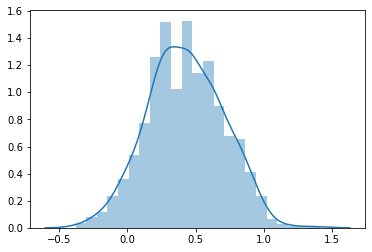

In [27]:
bootstrap(predictions_1, target_validate_1)

Среднее значение бутстрапированной прибыли для данного региона: 0.52 млрд.руб.
95% интервал для среднего значения бутстрапированной прибыли: от 0.5 млрд.руб. до 0.53 млрд.руб.
Стандартная ошибка среднего: 0.0069 млрд.руб.
95% значений бутстрапированной прибыли будет лежать в диапазоне от 0.07 млрд.руб. до 0.93 млрд.руб.
Размах этого диапазона: 0.86 млрд.руб.
Вероятность убытка при проведении работ в регионе: 1.0 %
Распределение прибыли из бутстрапированных выборок имеет сделующий вид:


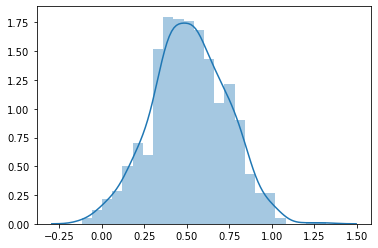

In [28]:
bootstrap(predictions_2, target_validate_2)

Среднее значение бутстрапированной прибыли для данного региона: 0.43 млрд.руб.
95% интервал для среднего значения бутстрапированной прибыли: от 0.42 млрд.руб. до 0.45 млрд.руб.
Стандартная ошибка среднего: 0.0089 млрд.руб.
95% значений бутстрапированной прибыли будет лежать в диапазоне от -0.13 млрд.руб. до 0.97 млрд.руб.
Размах этого диапазона: 1.1 млрд.руб.
Вероятность убытка при проведении работ в регионе: 6.3 %
Распределение прибыли из бутстрапированных выборок имеет сделующий вид:


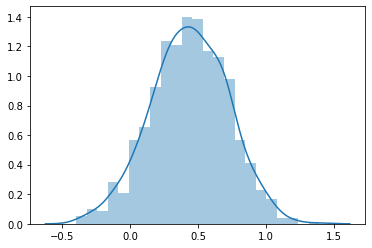

In [29]:
bootstrap(predictions_3, target_validate_3)

Наибольшее среднее значение бутстрапированной прибыли удалось достичь во 2 регионе: для данного региона среднее значение прибыли составило 0.52 млрд.руб. При этом с вероятностью в 95% истинное среднее значение прибыли для 2 региона лежит в диапазоне от 0.50 млрд.руб. до 0.53 млрд.руб. при стандартной ошибке среднего в 0.0069 млрд.руб. 95% значений бутстрапированной прибыли будет лежать в диапазоне от от 0.07 млрд.руб. до 0.93 млрд.руб., размах этого диапазона: 0.86 млрд.руб.
Вероятность получить убыток при разработке месторождений в этом регионе составляет 1%. Таким образом, регион, для которого модель сделала умеренно-консервативный прогноз, оказался наименее рискованным среди других регионов.

Так, например, в 3 регионе, который был ранее признан регионом с наиболее высоким риском, среднее значение бутстрапированной прибыли составило 0.43 млрд.руб. При этом с вероятностью в 95% истинное среднее значение прибыли для 3 региона лежит в диапазоне от 0.42 млрд.руб. до 0.45 млрд.руб. при стандартной ошибке среднего в 0.0089 млрд.руб. 95% значений бутстрапированной прибыли будет лежать в диапазоне от -0.13 млрд.руб. до 0.97 млрд.руб., размах этого диапазона: 1.1 млрд.руб.
Вероятность получить убыток при разработке месторождений в этом регионе составляет 6.3%. 

Отмечу также, что на данном этапе мы можем наблюдать справедливость центральной предельной теоремы: если многократно извлекать из совокупности выборки равного размера и рассчитывать по ним выборочные средние, эти средние нормально распределятся вокруг среднего генеральной совокупности со стандартной ошибкой среднего. Соответственно, чем меньше стандартная ошибка, тем более надёжен доверительный интервал для среднего значения.

Таким образом, учитывая анализ прибыльности каждого из регионов, а также сопряжённые с работой в регионах риски, можно говорить о том, что наиболее подходящим для разработки месторождений будет 2 регион: для этого региона характерно наибольшее среди других регионов среднее значение бутстрапированной прибыли, при этом доверительный интервал для истинного среднего значения бутстрапированной прибыли уже, чем интервалы для других регионов. Также для этого региона характерна наименьшая вероятность получения убытка.

# Вывод по этапу 4.

На данном этапе мы рассчитали возможную прибыль от разработки регионов и оценили риски проведения работ в этих регионах.

Наибольшее среднее значение бутстрапированной прибыли удалось достичь во 2 регионе: для данного региона среднее значение прибыли составило 0.52 млрд.руб. При этом с вероятностью в 95% истинное среднее значение прибыли для 2 региона лежит в диапазоне от 0.50 млрд.руб. до 0.53 млрд.руб. при стандартной ошибке среднего в 0.0069 млрд.руб. 95% значений бутстрапированной прибыли будет лежать в диапазоне от от 0.07 млрд.руб. до 0.93 млрд.руб., размах этого диапазона: 0.86 млрд.руб.
Вероятность получить убыток при разработке месторождений в этом регионе составляет 1%. Таким образом, регион, для которого модель сделала умеренно-консервативный прогноз, оказался наименее рискованным среди других регионов.

В 3 регионе, который был ранее признан регионом с наиболее высоким риском, среднее значение бутстрапированной прибыли составило 0.43 млрд.руб. При этом с вероятностью в 95% истинное среднее значение прибыли для 3 региона лежит в диапазоне от 0.42 млрд.руб. до 0.45 млрд.руб. при стандартной ошибке среднего в 0.0089 млрд.руб. 95% значений бутстрапированной прибыли будет лежать в диапазоне от -0.13 млрд.руб. до 0.97 млрд.руб., размах этого диапазона: 1.1 млрд.руб.
Вероятность получить убыток при разработке месторождений в этом регионе составляет 6.3%. 

Таким образом, учитывая анализ прибыльности каждого из регионов, а также сопряжённые с работой в регионах риски, можно говорить о том, что наиболее подходящим для разработки месторождений будет 2 регион: для этого региона характерно наибольшее среди других регионов среднее значение бутстрапированной прибыли, при этом доверительный интервал для истинного среднего значения бутстрапированной прибыли уже, чем интервалы для других регионов. Также для этого региона характерна наименьшая вероятность получения убытка.

<a href='#title'>К оглавлению.</a>

# Итоговый вывод по проекту.

Основываясь на данных добывающей компании «ГлавРосГосНефть», необходимо было решить, в каком из трёх предложенных регионов лучше всего бурить новые скважины.

Для исследования были предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

Необходимо было построить модель машинного обучения, основанную на алгоритме линейной регрессии, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

Работа над проектом велась в несколько этапов:

1. Импорт необходимых библиотек, чтение набора данных, его первичный анализ.


2. Обучение и проверка модели.


3. Подготовка к расчёту прибыли.


4. Расчёт прибыли и рисков.

Отметим основные выводы: 

### Этап 1.

На данном этапе мы импортировали необходимые библиотеки, а также считали и проанализировали предоставленные наборы данных.

Можно отметить, что в наборе данных представлены пробы нефти в трёх регионах. По атрибутному составу наборы данных идентичны друг другу: все три набора данных содержат id скважины, 3 параметра, описывающие некоторые характеристики скважин, а также объём запасов нефти в скважине (в тыс. баррелей). 

Каждый набор данных сожержит по 100 тыс. наблюдений. 

Данные не содержат аномалий, дубликатов или пропущенных значений, поэтому их предварительная обработка не требуется.

### Этап 2.

На данном этапе было произведено разделение наборов данных на тренировочную и валидационную части в соотношении 75% : 25%. Для разделения наборов данных на выборки была написана соответствующая функция.

Также для предсказания объёмов добычи нефти для всех трёх регионов была построеная модель линейной регрессии, для каждого региона был посчитан средний запас предсказанного сырья, а также определена метрика RMSE. Соответствующие метрики были сохранены в определённые переменные. Этот функционал также был реализован с помощью функции. При этом прогноз, построенный моделью, был отсортирован по убыванию объёмов добычи нефти, и RMSE и средний запас предсказанного сырья были оценены для топ-200 месторождений.

Наиболее оптимальное предсказание было построено для второго региона. Предсказанный средний запас сырья составил 68.73 тыс.баррелей, при этом данное предсказание отличается низким значением ошибки: в среднем, при предсказывании объёма добычи нефти в скважине ошибка модели составляет 0.89 тыс.баррелей. 

Можно сказать, что данный прогноз является консервативным: он предсказывает меньшие по сравнению с другими регионами объёмы добычи нефти, однако это предсказание более точное относительно других регионов.

Венчурным регионом - регионом с наибольшим риском - можно назвать 3 регион: модель предсказала средний объём добываемой нефти в размере 94.97 тыс.баррелей, при этом в среднем модель ошибается на 40.03 тыс.баррелей при предсказании объёма добычи нефти. Таким образом, модель предсказывает достаточно высокие объёмы добычи нефти относительно консервативной модели, однако эта модель допускает более высокую погрешность при предсказаннии объёмов добычи нефти. 

### Этап 3.

На данном этапе мы зафиксировали ряд констант, которые пригодятся при расчёте прибыли и рисков, а также определили точку безубыточности и другие бизнес-метрики, на основе которых можно принять решение о регионе, в котором будут вестись работы по разработке месторождений.

По результатам расчётов видим, что для достижения точки безубыточности компании нужно разведать не менее 141 месторождения в 1 регионе, не менее 161 месторождения во 2 регионе и не менее 149 месторождений в 3 регионе. 

При этом в каждой скважине, в среднем, должно быть около 157.93 тыс.баррелей нефти, 138.8 тыс.баррелей нефти и 149.71 тыс.баррелей нефти в 1, 2 и 3 регионах соответственно.

Построенная модель предсказала средние запасы нефти в скважине в 148.37 тыс.баррелей нефти для 1 региона, в 138.39 тыс.баррелей нефти для 2 региона и 142.33 тыс.баррелей нефти для 3 региона.

Таким образом, видно, что требуемый для достижения точки безубыточности предсказанный средний объём нефти в скважине при заданном количестве месторождений и необходимом объёме нефти в каждом из них недостаточен для выхода в точку безубыточности в каждом из регионов.

Однако известно, что при предсказании объёмов нефти модель, в среднем, ошибается на 28.23 тыс.баррелей нефти в 1 регионе, на 0.58 тыс.баррелей нефти во 2 регионе и на 30.76 тыс.баррелей нефти в 3 регионе. 

Также мы видим, что при указанном количестве скважин, необходимых к разработке, а также при требуемом среднем объёме запасов нефти в каждой скважине, компания получит доход в размере 10.02 млрд.руб., 10.06 млрд.руб. и 10.04 млрд.руб. в 1, 2 и 3 регионах соответственно. Это на 0.02 млрд.руб., 0.06 млрд.руб. и 0.04 млрд.руб. больше, чем требуется для достижения точки безубыточности, в 1, 2 и 3 регионах соответственно.

Таким образом, если предположить, что модель при предсказании объёма нефти в скважине занижает предсказанный объём на величину стандартной ошибки, а также переход за точку безубыточности на 0.02 млрд.руб., 0.06 млрд.руб. и 0.04 млрд.руб. в 1, 2 и 3 регионах соответственно при заданных параметрах, можно говорить о том, что точка средних запасов нефти в скважине, предсказанных моделью, должно хватить для достижения точки безубыточности на 141 месторождении в 1 регионе, на 161 месторождении во 2 регионе и на 149 месторождении в 3 регионе. 

При этом в 1 регионе останется ещё 59 скважин для разработки, во 3 регионе - 39, в 3 регионе - 51.

Разработка каждой новой скважины в 1 регионе принесёт компании 0.07 млрд.руб, во 2 регионе - 0.06 млрд.руб., в 3 регионе - 0.07 млрд.руб.

Разработка всех оставшихся скважин в 1 регионе принесёт компании 3.94 млрд.руб., во 2 регионе - 2.43 млрд.руб., в 3 регионе - 3.27 млрд.руб.

### Этап 4.

На данном этапе мы рассчитали возможную прибыль от разработки регионов и оценили риски проведения работ в этих регионах.

Наибольшее среднее значение бутстрапированной прибыли удалось достичь во 2 регионе: для данного региона среднее значение прибыли составило 0.52 млрд.руб. При этом с вероятностью в 95% истинное среднее значение прибыли для 2 региона лежит в диапазоне от 0.50 млрд.руб. до 0.53 млрд.руб. при стандартной ошибке среднего в 0.0069 млрд.руб. 95% значений бутстрапированной прибыли будет лежать в диапазоне от от 0.07 млрд.руб. до 0.93 млрд.руб., размах этого диапазона: 0.86 млрд.руб.
Вероятность получить убыток при разработке месторождений в этом регионе составляет 1%. Таким образом, регион, для которого модель сделала умеренно-консервативный прогноз, оказался наименее рискованным среди других регионов.

В 3 регионе, который был ранее признан регионом с наиболее высоким риском, среднее значение бутстрапированной прибыли составило 0.43 млрд.руб. При этом с вероятностью в 95% истинное среднее значение прибыли для 3 региона лежит в диапазоне от 0.42 млрд.руб. до 0.45 млрд.руб. при стандартной ошибке среднего в 0.0089 млрд.руб. 95% значений бутстрапированной прибыли будет лежать в диапазоне от -0.13 млрд.руб. до 0.97 млрд.руб., размах этого диапазона: 1.1 млрд.руб.
Вероятность получить убыток при разработке месторождений в этом регионе составляет 6.3%. 

Таким образом, учитывая анализ прибыльности каждого из регионов, а также сопряжённые с работой в регионах риски, можно говорить о том, что наиболее подходящим для разработки месторождений будет 2 регион: для этого региона характерно наибольшее среди других регионов среднее значение бутстрапированной прибыли, при этом доверительный интервал для истинного среднего значения бутстрапированной прибыли уже, чем интервалы для других регионов. Также для этого региона характерна наименьшая вероятность получения убытка.

<a href='#title'>К оглавлению.</a>